In this notebook I am plotting the adiabat populations obtained from calculating the Boltzmann populations from BOMD runs in X-SH, and X-SH runs using the FSSH procedure. In BOMD, all trajectories are propagated along the ground-state adiabat at t=0. In X-SH, the proportion of trajectories starting with an initial adiabat are equal to the boltzmann population of said adiabat from the BOMD runs.

The first set of boltzmann populations were calculated with no state-tracking involved in the BOMD, so we are always propagating along the ground state and the reference state is always the ground state. By reference state, I refer to the state whose energy we use to calculate the deltaE values in the exponential: this must always be the state along which you propagate the BOMD, as the exponential average is defined by the ratio of phase-space integrals (check notebook).

All X-SH trajectories involved state-tracking, as the trivial crossings will lead to incorrect hops between the adiabatic states, and a therefore incorrect nuclear dynamics. The X-SH populations in question are surface populations, and refer to the fraction of simulation time spent propagating along a given adiabat. In the X-SH runs leading to the two plots below, the surface populations were calculated by taking the relative occupancy of the adiabats that are ordered by absolute energy. For example, we calculate the population of the 3rd surface by counting the number of time steps inside this surface, as long as it is the third in energy, regardless of which adiabat at t=0 now corresponds to the one that is 3rd in energy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gs_boltzmann = np.array([9.99886269e-01, 1.01386252e-04, 1.12689932e-05, 9.74110232e-07, 7.51549582e-08, 1.84265011e-08, 7.69010689e-09, 4.61871141e-10,
  5.16717376e-11, 6.21313415e-12, 4.32073145e-14, 5.88755361e-17])

XSH_gs_surface = 1

adiabatic_states = np.arange(1,13)

The populations of both simulations are fully in the ground state. This is because the force-fields were parameterised to reproduce reorganisation energies calculated by DFT. These energies are quite large (~ 200-400 meV), so energy differences between adiabats that are centred on different molecules will be very large, so the excited-state energies we obtain when we move around the ground-state potential energy surface will be very high. It's worth mentioning that the differing extents of delocalisation mean the excited states' minima are higher in energy than the ground-state minimum, as more molecules are charged and therefore in a high-energy configuration.

We therefore need to reduce the reorganisation energies to 2-4 multiples of the thermal energy, as this will reduce the aforementioned energy difference and allow us to compare higher excited state populations between BOMD and X-SH. I will also remove the coulomb barrier, as the coulombic attraction in the interfacial CT-pair contributes to the stability of the ground state.

The reorganisation energy of an exciton refers to the energy required to transfer the excitation from one molecule to another. The reorganisation energy the cation/anion follows suit. However, that for the CT-state will be just one or the other, since it is defined to involve the transfer of only one electron or hole, not both. This is because our CT-diabats are defined so that there is coupling between those that share the location of one charge carrier, so the extent of delocalisation depends on the reorganisation energy of solely cation/anion transfer.

Text(0.5, 0, 'Adiabat')

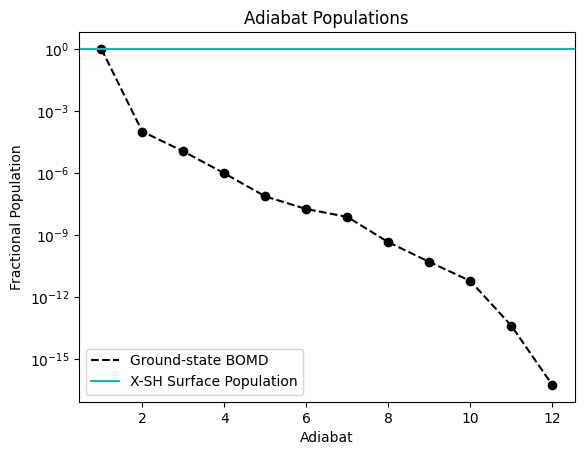

In [3]:
plt.plot(adiabatic_states, gs_boltzmann, color = 'k', linestyle = 'dashed', label = 'Ground-state BOMD')
plt.scatter(adiabatic_states, gs_boltzmann, color = 'k')
plt.axhline(1, color = 'c', label = 'X-SH Surface Population')
plt.legend()
plt.title('Adiabat Populations')
plt.yscale('log')
plt.ylabel('Fractional Population')
plt.xlabel('Adiabat')

I reduced the exciton reorganisation energy to ~4kT, and the CT analogue to ~2 kT, and removed the coulomb barrier. I reduced the reorganisation energy by identifying the bonds that samuele adjusted to get the DFT four-point value. I determined whether he had to contract or elongate these bonds. Then, I shortened/lengthened each of these bonds so they lay inbetween the neutral equilibrium value and thos obtained by fitting them to DFT. After doing this, I reran the BOMD simulations.

In [4]:
low_lambda_boltzmann = np.array([7.82211564e-01, 2.00829956e-01, 1.63613853e-02, 4.37439366e-04,
 1.38687693e-04, 1.58739334e-05, 3.79855423e-06, 1.17355212e-06,
 1.21676036e-07, 9.41776483e-19, 5.27412233e-21, 3.05866600e-23])

low_lambda_XSH_surface = np.array([6.10590075e-01, 3.57692193e-01, 3.06279669e-02, 9.83905852e-04,
  1.05858699e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
  0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

The boltzmann populations are calculated using the assumption that the energy orderings of the adiabats do not change, so we are always avering the relative population of adiabat i (ith in energy) with respect to the ground-state at that time step. This means the relative population of the ground state is always 1. We can't use the direct calculation of the exponentiated energies when averaging them other the same state after a trivial crossing, because some of these exponentiated energies will be very positive and skew the mena towards this value, whilst this is never repeated for the ground-state, since the ground-state exponential can be 1 at most (it is the reference).

Therefore, we divide our deltaE's into two sections: one where all deltaE's are zero or positive (reference state is ground state), or one where one or more deltaE's are negative. The exponential values are calculated as usual for the former. For the latter, we calculate the exponentiated energies of every state relative to the (excited-state) reference, but we then multiply all of these by the reciprocal of p0/pref. This gives us the relative populations of the states relative to the ground-states, which we can now add to the relative populations calculated for the former case, and calculate a relative population that is averaged over all sampled nuclear configurations.

Text(0.5, 0, 'Adiabat')

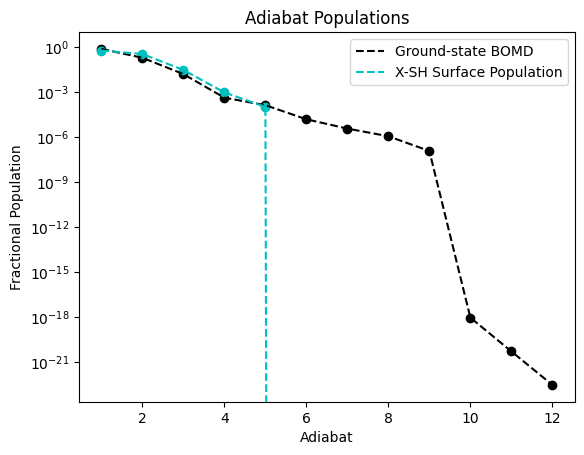

In [5]:
plt.plot(adiabatic_states, low_lambda_boltzmann, color = 'k', linestyle = 'dashed', label = 'Ground-state BOMD')
plt.scatter(adiabatic_states, low_lambda_boltzmann, color = 'k')
plt.plot(adiabatic_states, low_lambda_XSH_surface, color = 'c', linestyle = 'dashed', label = 'X-SH Surface Population')
plt.scatter(adiabatic_states, low_lambda_XSH_surface, color = 'c')
plt.legend()
plt.title('Adiabat Populations')
plt.yscale('log')
plt.ylabel('Fractional Population')
plt.xlabel('Adiabat')

The actual ground-state and excited state populations of the two simulations vary by ~20%, which is satisfactory. The X-SH surface population drops off after the 5th adiabat because no timestep was ever propagated in such a state - too high in energy.

The excited and ground-state boltzmann populations also converge with the number of (1ps) trajectories used, so using ~200ps of total simulation time seems satisfactory. We cut off the first 300fs of each run to account for relaxation of the nuclear configuration reordering the states, as we want to be propagating along the ground state for the majprity of the simulation - if not, we risk undersampling it and therefore overestimating the Boltzmann populations of our excited states.

We would actually like to directly sample the adiabats in the order they were in at t=0, and not calculate the populations of the adiabats that are ordered by absolute energy. This is more consistent with the state tracking procedure in X-SH, since the surfaces populated in X-SH are tracked such that the surface remains the one initialised at t=0, unless a hop has taken place.

To calculate the Boltzmann populations in this method, I track the indice of each adiabat at t=0, and so that the energy sampled at each adiabat is mapped back to the energy order of that adiabat at t=0. I then average over all these energies, and put these average energies into the expression for the Boltzmann populations, using the average energy of the (average) ground-state as a baseline, so its energy is zero. Using the same force-field, (lack of a) coulomb barrier and coupling strength, I obtain much smaller excited-state boltzmann populations compared to averaging the relative populations of solely energy-ordered adiabats.

Here, I will plot the energies of the state-tracked adiabats versus the energy ordered adiabats, to show that the reason why this occurs is that the average energy of the 1st (or nth) excited state by absolute energy ordering, is on average lower than the state-tracked 1st excited state, since the state-tracked one will cross into a higher energy level, whereas the absolute state will obviously remain the 2nd lowest energy state for the whole dynamics.

Below is the detailed balance plot for the state-tracked Boltzmann and X-SH surface populations. This involved sampling geometries for the BOMD runs from classical NVT/NVE runs with neutral focrefields for every molecule in the system.

In [6]:
lowest_lambda_boltzmann = np.array([7.86051746e-01, 6.62516681e-02, 4.85727961e-02, 3.62193772e-02,
 2.54086975e-02, 1.31534736e-02, 1.15651037e-02, 8.46088961e-03,
 4.31624824e-03, 2.58877699e-16, 1.60878223e-18, 1.14867352e-20])

lowest_lambda_XSH = np.array([0.39080417, 0.14234038, 0.1218783,  0.09446508, 0.07601914, 0.07362377,
 0.05081346, 0.03140337, 0.01865234, 0,         0,         0,        ])

lowest_lambda_XSH_trackedcutoff = np.array([0.4678753,  0.16027282, 0.12684831, 0.07512784, 0.05904228, 0.04047922,
 0.03187616, 0.02259677, 0.0158813,  0,         0,        0,        ])

Text(0.5, 0, 'Adiabat')

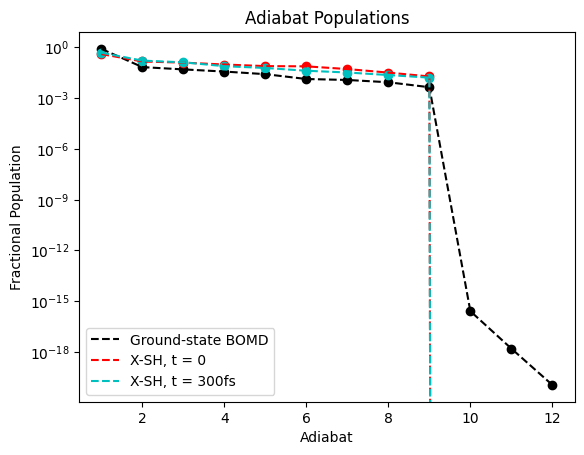

In [7]:
plt.plot(adiabatic_states, lowest_lambda_boltzmann, color = 'k', linestyle = 'dashed', label = 'Ground-state BOMD')
plt.scatter(adiabatic_states, lowest_lambda_boltzmann, color = 'k')
plt.plot(adiabatic_states, lowest_lambda_XSH, color = 'r', linestyle = 'dashed', label = 'X-SH, t = 0')
plt.scatter(adiabatic_states, lowest_lambda_XSH, color = 'r')
plt.plot(adiabatic_states, lowest_lambda_XSH_trackedcutoff, color = 'c', linestyle = 'dashed', label = 'X-SH, t = 300fs')
plt.scatter(adiabatic_states, lowest_lambda_XSH_trackedcutoff, color = 'c')
plt.legend()
plt.title('Adiabat Populations')
plt.yscale('log')
plt.ylabel('Fractional Population')
plt.xlabel('Adiabat')

Plotting the accumulated surface populations of the first 2 states using X-SH trajectories.

Re-did the detailed balance calculation but with the equilibration runs done with an interfacial pair of molecules having a charged force-field for the classical NVT, then I did a 40-picosecond NVE runs within X-SH BOMD, and negelected the first 20ps since the system will have to slightly equilibrate due to the potential energy surface slightly changing (included couplings and >1 molecule having a charged force-field). I then sampled 200 geometries from the last 20ps, where the t=0 ground state was still the ground state, and used these geometries/velocities as starting points for 200 1.2ps trajectories for BOMD/FSSH runs with X-SH. I used the t=0 ground state since this remains the majority ground state for the entire duration of the run, not the just the first/last 20ps. This allows us to sample the full 1ps of each trajectory, since we don't have to wait for any equilibration, and we know that the t=0 ground state is the majority ground state. (However, this isn't true about the excited states, since they constantly trivially cross even after the first 20ps of the NVE run; this can be a source of error for the 200 trajectory approach, since the t=0 excited states may not all correspond to that same state in the 40ps NVE run)

Text(0.5, 0, 'Adiabat')

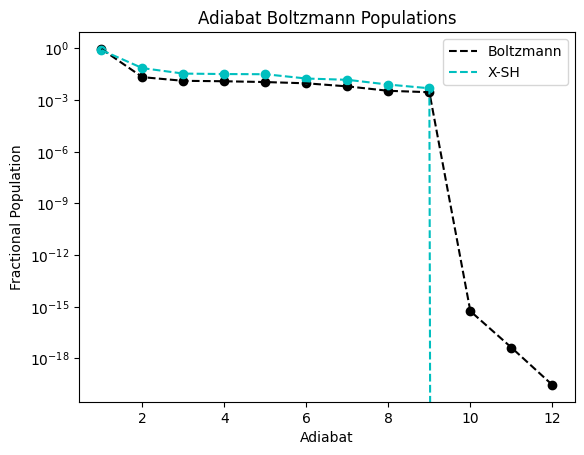

In [8]:
real_NVE_boltzmann = np.array([9.21253568e-01, 2.10848110e-02, 1.29132150e-02, 1.21954265e-02, 1.09517914e-02, 9.24705109e-03, 6.14276999e-03, 3.40019028e-03,
 2.81117663e-03, 5.36212818e-16, 4.15361545e-18, 2.78244418e-20])

real_NVE_surface = np.array([0.7873923, 0.07052246, 0.03398925, 0.0319665, 0.03120032, 0.01755687,
 0.0147821, 0.00782893, 0.00476127, 0, 0, 0])

plt.plot(adiabatic_states, real_NVE_boltzmann, color = 'k', linestyle = 'dashed', label = 'Boltzmann')
plt.scatter(adiabatic_states, real_NVE_boltzmann, color = 'k')
plt.plot(adiabatic_states, real_NVE_surface, color = 'c', linestyle = 'dashed', label = 'X-SH')
plt.scatter(adiabatic_states, real_NVE_surface, color = 'c')
plt.legend()
plt.title('Adiabat Boltzmann Populations')
plt.yscale('log')
plt.ylabel('Fractional Population')
plt.xlabel('Adiabat')

Re-plotting the energy orderings of the first/second exicted states with time for the X-SH NVE run, to show that the small boltzmann populations are due to these states constantly crossing to higher energies.

Text(0.5, 1.0, '1st Excited State - Energy Ordering')

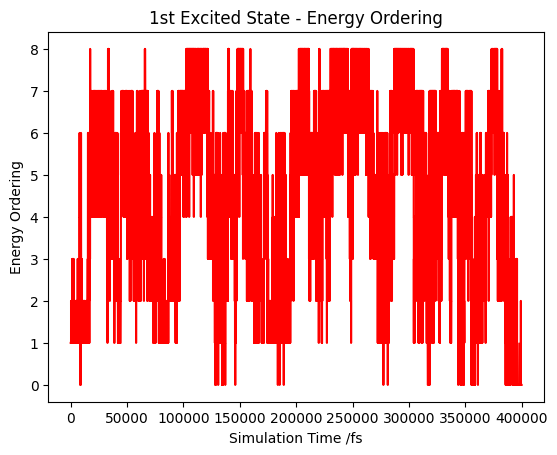

In [9]:
NVE_tracked_states = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/state-array-NVE.txt')
simulation_time = np.arange(0, len(NVE_tracked_states))

excited_state_index = []
for element in NVE_tracked_states:
    current_index = np.where(element == 2)[0][0]
    current_index = int(current_index)
    excited_state_index.append(current_index)

plt.plot(simulation_time, excited_state_index, color = 'r')
plt.ylabel('Energy Ordering')
plt.xlabel('Simulation Time /fs')
plt.title('1st Excited State - Energy Ordering')

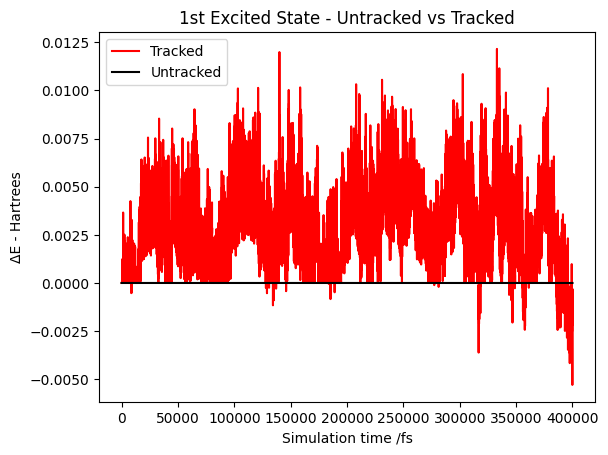

In [10]:
NVE_untracked_energies = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/untracked-energy-array-NVE.txt')
NVE_tracked_energies = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/energy-array-NVE.txt')

NVE_tracked_energies = NVE_tracked_energies - NVE_untracked_energies
NVE_untracked_energies = NVE_untracked_energies - NVE_untracked_energies

plt.plot(simulation_time, NVE_tracked_energies[:,1], label = 'Tracked', color = 'r')
plt.plot(simulation_time, NVE_untracked_energies[:,1], label = 'Untracked', color = 'k')
plt.xlabel('Simulation time /fs')
plt.ylabel('\u0394E - Hartrees')
plt.title('1st Excited State - Untracked vs Tracked')
plt.legend()

Text(0.5, 1.0, 'Ground-state Boltzmann Population vs Trajectories')

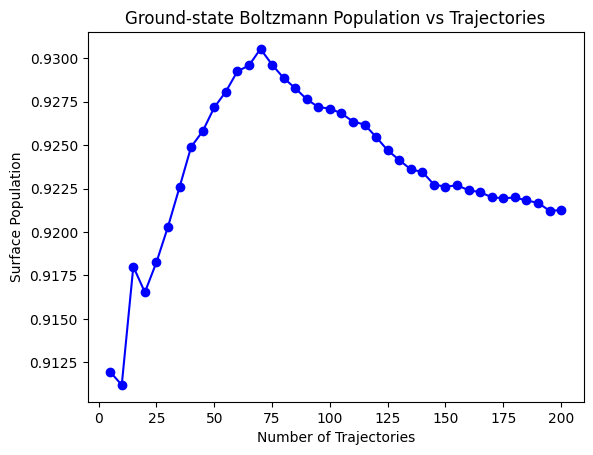

In [11]:
real_NVE_accumulated = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/real-NVE-boltzmann-accumulated.txt')
number_trajectories = np.arange(5,205,5)

real_NVE_accumulated_1 = real_NVE_accumulated[:,0]
real_NVE_accumulated_2 = real_NVE_accumulated[:,1]


plt.plot(number_trajectories, real_NVE_accumulated_1, color = 'b')
plt.scatter(number_trajectories, real_NVE_accumulated_1, color = 'b')
plt.xlabel('Number of Trajectories')
plt.ylabel('Surface Population')
plt.title('Ground-state Boltzmann Population vs Trajectories')

Text(0.5, 1.0, '1st Excited-state Boltzmann Population vs Trajectories')

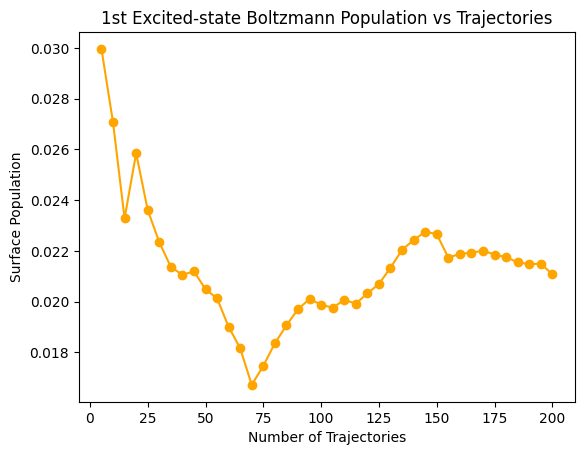

In [12]:
plt.plot(number_trajectories, real_NVE_accumulated_2, color = 'orange')
plt.scatter(number_trajectories, real_NVE_accumulated_2, color = 'orange')
plt.xlabel('Number of Trajectories')
plt.ylabel('Surface Population')
plt.title('1st Excited-state Boltzmann Population vs Trajectories')

We re-did the Boltzmann and FSSH runs again to try to correct the error you get from not tracking the trajectories' adiabats with respect to t=0 adiabats of the BOMD-NVE run - this causes you to sample the same adiabat in the NVE run as potentially different adiabats across the trajectories.

12ps FSSH runs, 8ps BOMD runs, 60 trajectories each, initial geometries sampled from 500ps intervals of the last 30ps of the NVE run, for both sets of runs. The Boltzmann and surface populations disagree completely. I will plot the first trajectories' energy levels (vs time), as I suspect that the propagation along excited-state adiabats brings their energy down a lot, and causes them to be oversampled (or undersampled in the BOMD runs). 

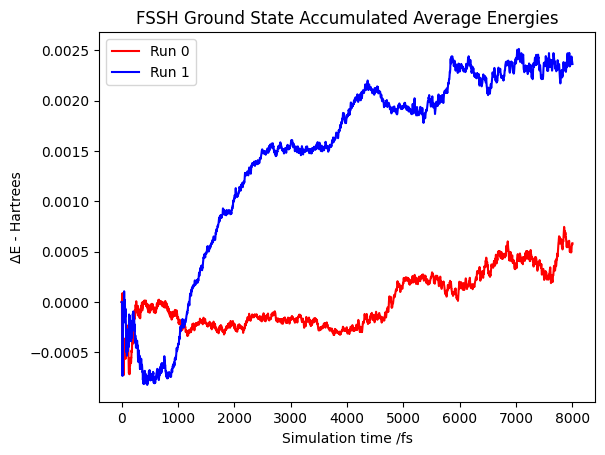

In [13]:
BOMD_run0_energies = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/BOMD-run0-energies.txt')
XSH_run0_energies = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/XSH-run0-energies.txt')
BOMD_run12_energies = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/BOMD-run12-energies.txt')
XSH_run12_energies = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/XSH-run12-energies.txt')

BOMD_run_time = np.arange(0, len(BOMD_run0_energies))*0.1
XSH_run_time = np.arange(0, len(XSH_run0_energies))*0.1

acc_run0_gs_avg = np.cumsum(XSH_run0_energies[:len(BOMD_run0_energies),0] - BOMD_run0_energies[:,0]) / np.arange(1, len(BOMD_run0_energies) + 1)
acc_run12_gs_avg = np.cumsum(XSH_run12_energies[:len(BOMD_run12_energies),0] - BOMD_run12_energies[:,0]) / np.arange(1, len(BOMD_run12_energies) + 1)

acc_run0_s8_avg = np.cumsum(XSH_run0_energies[:len(BOMD_run0_energies),8] - BOMD_run0_energies[:,8]) / np.arange(1, len(BOMD_run0_energies) + 1)
acc_run12_s3_avg = np.cumsum(XSH_run12_energies[:len(BOMD_run12_energies),3] - BOMD_run12_energies[:,3]) / np.arange(1, len(BOMD_run12_energies) + 1)

plt.plot(BOMD_run_time, acc_run0_gs_avg, color = 'r', label = 'Run 0')
plt.plot(BOMD_run_time, acc_run12_gs_avg, color = 'b', label = 'Run 1')
plt.xlabel('Simulation time /fs')
plt.ylabel('\u0394E - Hartrees')
plt.title('FSSH Ground State Accumulated Average Energies')
plt.legend()

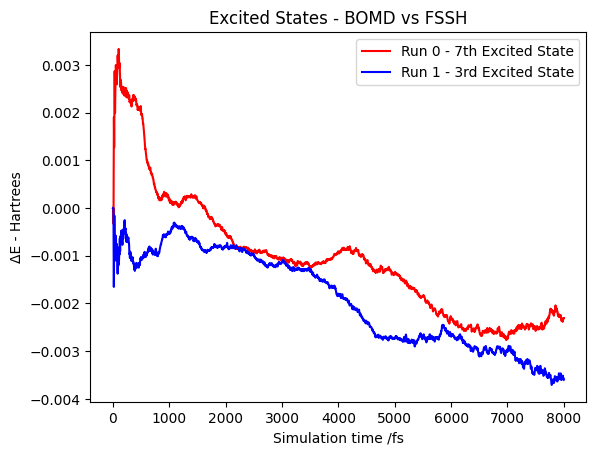

In [14]:
plt.plot(BOMD_run_time, acc_run0_s8_avg, color = 'r', label = 'Run 0 - 7th Excited State')
plt.plot(BOMD_run_time, acc_run12_s3_avg, color = 'b', label = 'Run 1 - 3rd Excited State')
plt.xlabel('Simulation time /fs')
plt.ylabel('\u0394E - Hartrees')
plt.title('Excited States - BOMD vs FSSH')
plt.legend()

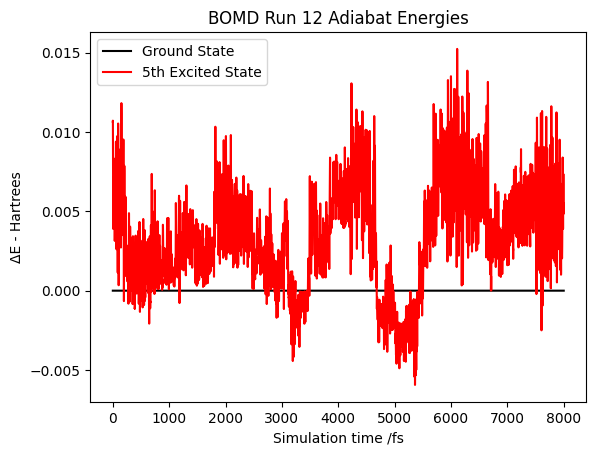

In [15]:
plt.plot(BOMD_run_time, BOMD_run12_energies[:,0] - BOMD_run12_energies[:,0], color = 'k', label = 'Ground State')
plt.plot(BOMD_run_time, BOMD_run12_energies[:,5] - BOMD_run12_energies[:,0], color = 'r', label = '5th Excited State')
plt.xlabel('Simulation time /fs')
plt.ylabel('\u0394E - Hartrees')
plt.title('BOMD Run 12 Adiabat Energies')
plt.legend()

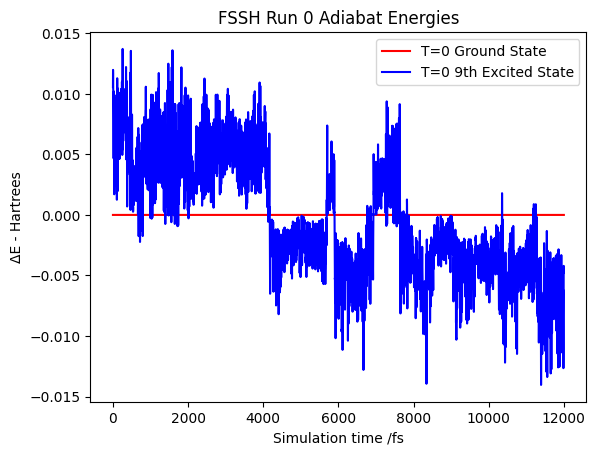

In [16]:
plt.plot(XSH_run_time, XSH_run0_energies[:,0] - XSH_run0_energies[:,0], color = 'r', label = 'T=0 Ground State')
plt.plot(XSH_run_time, XSH_run0_energies[:,8] - XSH_run0_energies[:,0], color = 'b', label = 'T=0 9th Excited State')
plt.xlabel('Simulation time /fs')
plt.ylabel('\u0394E - Hartrees')
plt.title('FSSH Run 0 Adiabat Energies')
plt.legend()

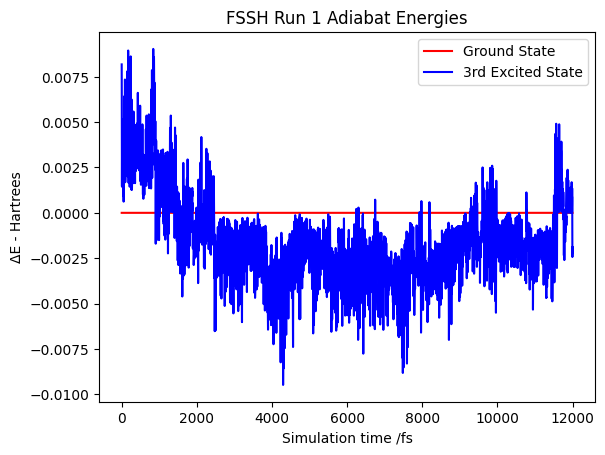

In [17]:
plt.plot(XSH_run_time, XSH_run12_energies[:,0] - XSH_run12_energies[:,0], color = 'r', label = 'Ground State')
plt.plot(XSH_run_time, XSH_run12_energies[:,3] - XSH_run12_energies[:,0], color = 'b', label = '3rd Excited State')
plt.xlabel('Simulation time /fs')
plt.ylabel('\u0394E - Hartrees')
plt.title('FSSH Run 1 Adiabat Energies')
plt.legend()

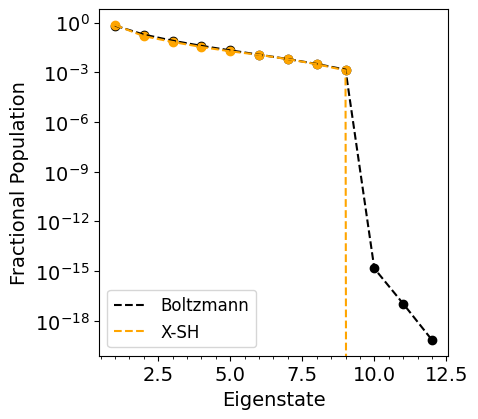

In [18]:
NVE_untracked_boltzmann = np.array([6.50951733e-01, 1.87122377e-01, 7.98559861e-02, 3.88718971e-02,
 2.09146590e-02, 1.14577630e-02, 6.23748576e-03, 3.15236856e-03,
 1.43573067e-03, 1.41624499e-15, 1.06184871e-17, 6.81742624e-20])

NVE_untracked_surface = np.array([0.70939701, 0.15043809, 0.06720642, 0.03315762, 0.01823188, 0.01115008,
 0.0061061,  0.00303019, 0.0012826, 0, 0, 0])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4.5,4.5))

ax.plot(adiabatic_states, NVE_untracked_boltzmann, color = 'k', linestyle = 'dashed', label = 'Boltzmann')
ax.scatter(adiabatic_states, NVE_untracked_boltzmann, color = 'k')
ax.plot(adiabatic_states, NVE_untracked_surface, color = 'orange', linestyle = 'dashed', label = 'X-SH')
ax.scatter(adiabatic_states, NVE_untracked_surface, color = 'orange')
ax.legend(fontsize = 12)
ax.set_yscale('log')
ax.set_ylabel('Fractional Population', fontsize = 14)
ax.set_xlabel('Eigenstate', fontsize = 14)
ax.minorticks_on()
ax.xaxis.set_tick_params(labelsize = 14)
ax.yaxis.set_tick_params(labelsize = 14)

Text(0.5, 1.0, 'Run 0 Active State')

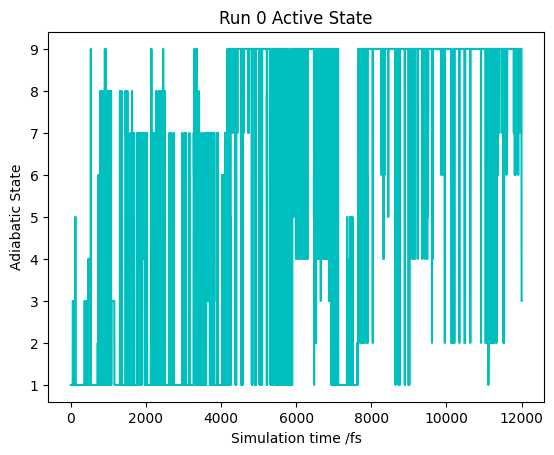

In [19]:
run0_active_states = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/active-states-run0.txt')
run12_active_states = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/active-states-run12.txt')

plt.plot(XSH_run_time, run0_active_states, color = 'c')
plt.xlabel('Simulation time /fs')
plt.ylabel('Adiabatic State')
plt.title('Run 0 Active State')

Text(0.5, 1.0, 'Run 12 Active State')

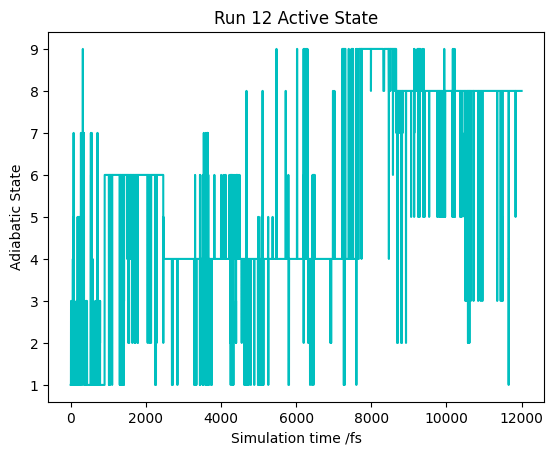

In [20]:
plt.plot(XSH_run_time, run12_active_states, color = 'c')
plt.xlabel('Simulation time /fs')
plt.ylabel('Adiabatic State')
plt.title('Run 12 Active State')

(1.0, 12.0)

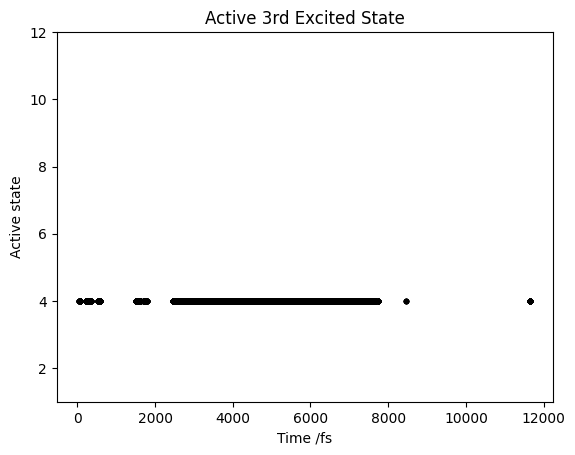

In [21]:
state4_indices = np.where(run12_active_states==4)[0]
state4_timesteps = np.array([XSH_run_time[index] for index in state4_indices])
state4_numbers = np.ones(len(state4_timesteps))*4

plt.scatter(state4_timesteps, state4_numbers, color = 'k', marker='.')
plt.ylabel('Active state')
plt.xlabel('Time /fs')
plt.title('Active 3rd Excited State')
plt.ylim([1,12])

Text(0.5, 1.0, 'Ground state energy vs Active state')

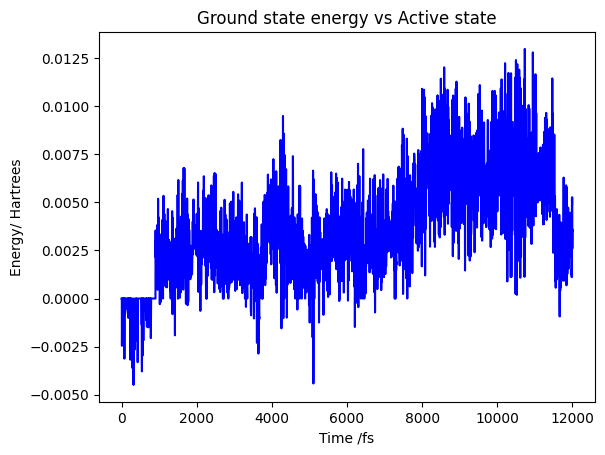

In [22]:
relative_gs_energy_run12 = []

for index in range(len(run12_active_states)):

    state_index = int(run12_active_states[index]) - 1
    active_state_energy = XSH_run12_energies[index][state_index]

    ground_state_energy = XSH_run12_energies[index][0]
    
    relative_gs_energy_run12.append(ground_state_energy - active_state_energy)

plt.plot(XSH_run_time, relative_gs_energy_run12, color = 'b')
plt.xlabel('Time /fs')
plt.ylabel('Energy/ Hartrees')
plt.title('Ground state energy vs Active state')

Text(0.5, 0, 'Adiabat')

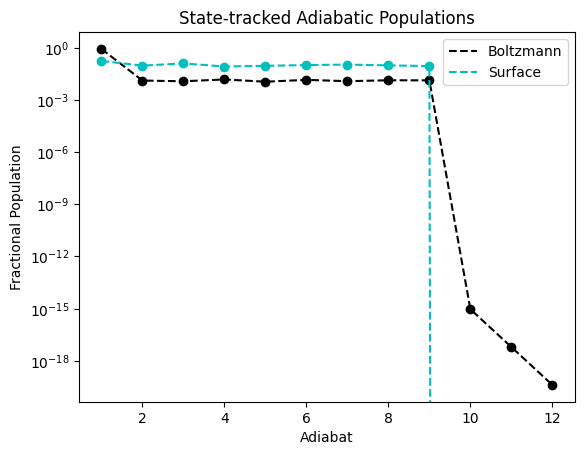

In [23]:
NVE_tracked_boltzmann2 = np.array([8.92280856e-01, 1.34333364e-02, 1.22609683e-02, 1.55617983e-02,
 1.15505673e-02, 1.47150084e-02, 1.24024648e-02, 1.39569684e-02,
 1.38380316e-02, 9.21461081e-16, 6.10608816e-18, 4.01073840e-20])

NVE_tracked_surface2 = np.array([0.18142335, 0.0972764, 0.13048176, 0.08666678, 0.0948428, 0.10482257,
 0.11176062, 0.10092941, 0.0917963, 0, 0, 0])

plt.plot(adiabatic_states, NVE_tracked_boltzmann2, color = 'k', linestyle = 'dashed', label = 'Boltzmann')
plt.scatter(adiabatic_states, NVE_tracked_boltzmann2, color = 'k')
plt.plot(adiabatic_states, NVE_tracked_surface2, color = 'c', linestyle = 'dashed', label = 'Surface')
plt.scatter(adiabatic_states, NVE_tracked_surface2, color = 'c')
plt.legend()
plt.title('State-tracked Adiabatic Populations')
plt.yscale('log')
plt.ylabel('Fractional Population')
plt.xlabel('Adiabat')

Text(0.5, 0, 'Adiabat')

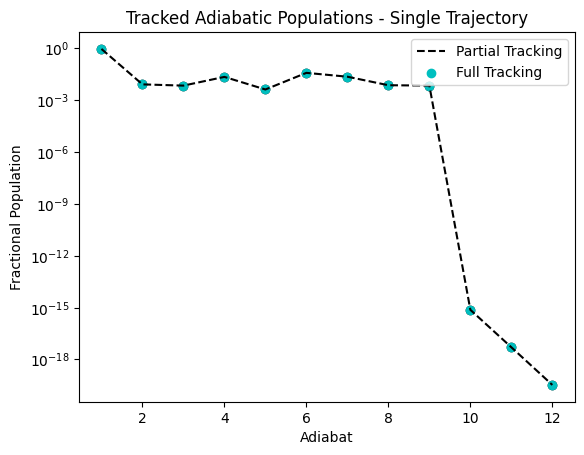

In [24]:
NVE_untracked_boltzmann_test = np.array([8.87348379e-01, 7.92516498e-03, 6.72001030e-03, 2.14575641e-02,
 4.01417207e-03, 3.67317007e-02, 2.19881314e-02, 7.07418980e-03,
 6.74068794e-03, 7.40377728e-16, 5.06378311e-18, 3.38074812e-20])

NVE_untracked_surface_test = np.array([8.87348379e-01, 7.92516498e-03, 6.72001030e-03, 2.14575641e-02,
 4.01417207e-03, 3.67317007e-02, 2.19881314e-02, 7.07418980e-03,
 6.74068794e-03, 7.40377728e-16, 5.06378311e-18, 3.38074812e-20])

plt.plot(adiabatic_states, NVE_untracked_boltzmann_test, color = 'k', linestyle = 'dashed', label = 'Partial Tracking')
plt.scatter(adiabatic_states, NVE_untracked_boltzmann_test, color = 'k')
plt.scatter(adiabatic_states, NVE_untracked_surface_test, color = 'c', label = 'Full Tracking')
plt.legend()
plt.title('Tracked Adiabatic Populations - Single Trajectory')
plt.yscale('log')
plt.ylabel('Fractional Population')
plt.xlabel('Adiabat')

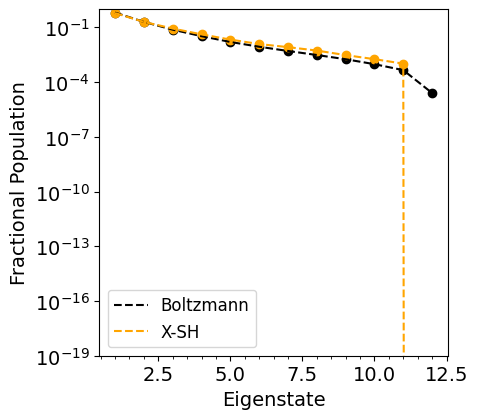

In [25]:
NVE_untracked_boltzmann = np.array([6.52738841e-01, 2.01903363e-01, 7.57890929e-02 ,3.32837684e-02,
 1.60326389e-02, 8.76758063e-03, 5.13539717e-03, 3.08545085e-03,
 1.81246291e-03, 9.69335625e-04, 4.56612776e-04, 2.54551506e-05])

NVE_untracked_surface = np.array([0.61627708, 0.20093542, 0.08733333, 0.04186458, 0.02163958 ,0.01228542,
 0.00835 ,   0.00540625, 0.00304792, 0.001825,   0.00103542, 0.        ])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4.5,4.5))

ax.plot(adiabatic_states, NVE_untracked_boltzmann, color = 'k', linestyle = 'dashed', label = 'Boltzmann')
ax.scatter(adiabatic_states, NVE_untracked_boltzmann, color = 'k')
ax.plot(adiabatic_states, NVE_untracked_surface, color = 'orange', linestyle = 'dashed', label = 'X-SH')
ax.scatter(adiabatic_states, NVE_untracked_surface, color = 'orange')
ax.legend(fontsize = 12)
ax.set_yscale('log')
ax.set_ylim([1e-19, 1])
ax.set_ylabel('Fractional Population', fontsize = 14)
ax.set_xlabel('Eigenstate', fontsize = 14)
ax.minorticks_on()
ax.xaxis.set_tick_params(labelsize = 14)
ax.yaxis.set_tick_params(labelsize = 14)